# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [20]:
### Load the data into dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [21]:
# As there are too many columns here, let us first check the column names
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

### 1. Find the 10 countries with most projects
For exercise 1, since we only care about the number of projects for each country, we may remove some redundant columns.

In [22]:
json_df_1 = json_df[['id',
                     'country_namecode',
                     'countrycode',
                     'countryname',
                     'countryshortname',
                     'project_name']]

In [23]:
json_df_1.head()

,id,country_namecode,countrycode,countryname,countryshortname,project_name
0,P129828,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,Ethiopia General Education Quality Improvement...
1,P144674,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,TN: DTF Social Protection Reforms Support
2,P145310,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,P144665,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",Gov't and Civil Society Organization Partnership
4,P144933,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,Second Private Sector Competitiveness and Econ...


In [24]:
json_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
id                  500 non-null object
country_namecode    500 non-null object
countrycode         500 non-null object
countryname         500 non-null object
countryshortname    500 non-null object
project_name        500 non-null object
dtypes: object(6)
memory usage: 23.5+ KB


As there are no null objects for country shor names, firstly lets look at the distribution for numbers of projects.

In [25]:
len(json_df_1.countryshortname.unique())

118

Wow 118 countries are listed here, and thus I cannot use bar plot here. The histgram below shows that most countries have 1~4 projects. There are also few countries have over 10 projects.

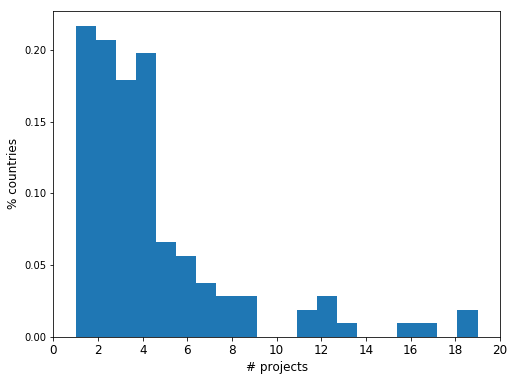

In [27]:
import matplotlib.pyplot as plt
count_p = json_df_1.groupby('countryshortname')[['id']].count()
count_p.plot(kind='hist', bins=20, density=True, legend=False, figsize=(8,6))
plt.xlim(0,20)
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18 ,20], fontsize=12)
plt.xlabel('# projects', fontsize=12)
plt.ylabel('% countries', fontsize=12)
plt.show()

It's now time to solve problem 1. Below is the 10 countries with most projects.

In [28]:
count_p.sort_values(by='id', ascending=False).head(10)

,id
countryshortname,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


### 2. Find the top 10 major project themes

Similar to exerciese 1, I'd use `group` method to find the top 10 major project themes

In [29]:
json_df_2 = json_df[['id',
                     'mjtheme_namecode']]

In [30]:
json_df_2.head()

,id,mjtheme_namecode
0,P129828,"[{'code': '8', 'name': 'Human development'}, {..."
1,P144674,"[{'code': '1', 'name': 'Economic management'},..."
2,P145310,"[{'code': '5', 'name': 'Trade and integration'..."
3,P144665,"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,P144933,"[{'code': '5', 'name': 'Trade and integration'..."


The `mjtheme_namecode` column is of dict datatype and each project may contain multiple themes.
Another problem is that some names are missing. However, the information about `namecode` is complete. So firstly, I'll try to implement the missing names according to their codes and after that we can clearly see what's the top 10 themes.

In [106]:
from collections import defaultdict
code_themes = defaultdict(str)
project_themes = defaultdict(int)
for line in json_df_2['mjtheme_namecode']:
    n_names = len(line)
    for index in range(0, n_names):
        code = line[index]['code']
        name = line[index]['name']
        if name != '':
            code_themes[code] = name
        project_themes[code] += 1

In [107]:
project_themes

defaultdict(int,
            {'8': 210,
             '11': 250,
             '1': 38,
             '6': 168,
             '5': 77,
             '2': 199,
             '7': 130,
             '4': 146,
             '10': 216,
             '9': 50,
             '3': 15})

In [108]:
code_themes

defaultdict(str,
            {'8': 'Human development',
             '1': 'Economic management',
             '6': 'Social protection and risk management',
             '5': 'Trade and integration',
             '2': 'Public sector governance',
             '11': 'Environment and natural resources management',
             '7': 'Social dev/gender/inclusion',
             '4': 'Financial and private sector development',
             '10': 'Rural development',
             '9': 'Urban development',
             '3': 'Rule of law'})

In [102]:
project_themes_df = pd.DataFrame(list(project_themes.items()), columns=['code', 'count'])
code_themes_df = pd.DataFrame(list(code_themes.items()), columns=['code', 'name'])
code_name_count = pd.merge(project_themes_df, code_themes_df)

From the output below, we can know what the top 10 project themes are:

In [110]:
code_name_count.sort_values('count', ascending=False).reset_index(drop=True)

,code,count,name
0,11,250,Environment and natural resources management
1,10,216,Rural development
2,8,210,Human development
3,2,199,Public sector governance
4,6,168,Social protection and risk management
5,4,146,Financial and private sector development
6,7,130,Social dev/gender/inclusion
7,5,77,Trade and integration
8,9,50,Urban development
9,1,38,Economic management


### 3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.
In 2, I already created a dictionary for codes and names. So for exercise 3, lets use that dict to fill all missing names.

In [112]:
code_themes

defaultdict(str,
            {'8': 'Human development',
             '1': 'Economic management',
             '6': 'Social protection and risk management',
             '5': 'Trade and integration',
             '2': 'Public sector governance',
             '11': 'Environment and natural resources management',
             '7': 'Social dev/gender/inclusion',
             '4': 'Financial and private sector development',
             '10': 'Rural development',
             '9': 'Urban development',
             '3': 'Rule of law'})

In [114]:
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [116]:
json_df['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [123]:
new_mjtheme_namecode = []
for line in json_df_2['mjtheme_namecode']:
    n_names = len(line)
    new_line =[]
    for index in range(0, n_names):
        code = line[index]['code']
        new_line.append({'code': code, 'name': code_themes[code]})
    new_mjtheme_namecode.append(new_line)
json_df['mjtheme_namecode'] = new_mjtheme_namecode